In [363]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('dataset_35_dermatology (1).csv')

In [3]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [5]:
data.shape

(366, 35)

In [6]:
data['Age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [7]:
data.isna()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


By using the df.isna() function, we can confirm that there are no null values present in the dataset. However, upon further inspection, we observed that there are some rows in the dataset where the age column is denoted as "?". To address this issue, we will remove the rows containing the "?" value in the age column from the dataset. 

In [8]:
data['Age'] = data['Age'].replace('?',np.nan)
data['Age'] = data['Age'].astype('float')

In [9]:
data['Age'].fillna(data['Age'].median(),inplace=True)

In [10]:
data['Age'].dtypes

dtype('float64')

## DATA VISUALIZATION
we utilize data visualization techniques to visually explore and communicate insights from the Dermatology Dataset. By creating meaningful and informative visual representations such as plots, charts, and graphs, we aim to uncover patterns, relationships, and trends within the data

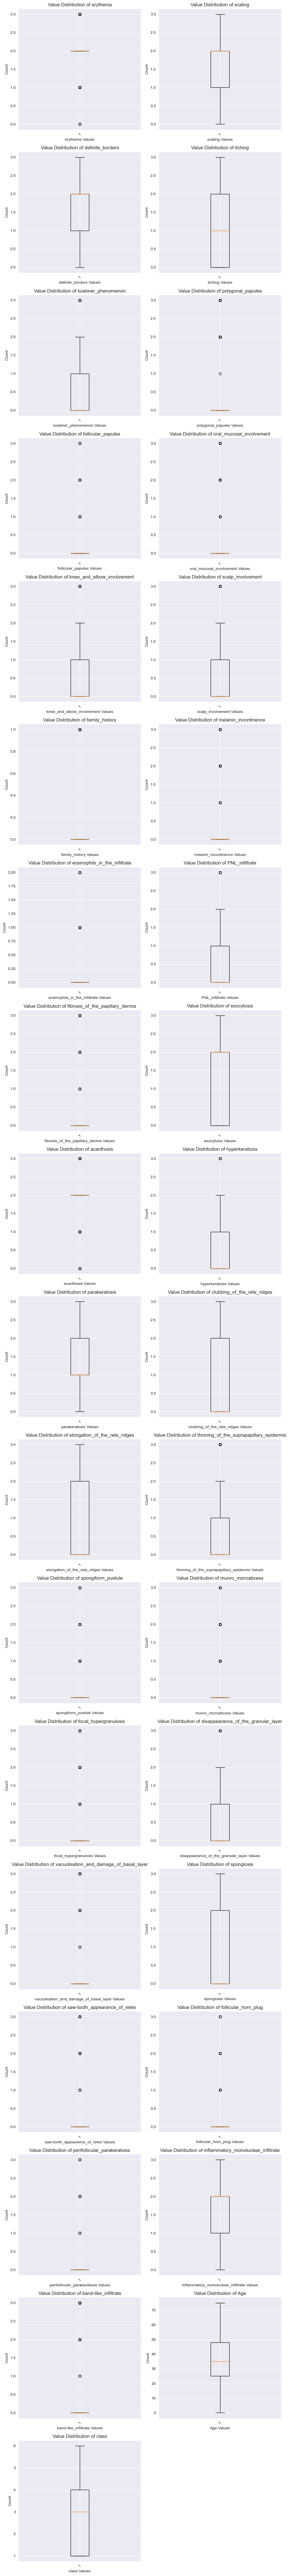

In [11]:
cols = 2
rows = (len(data.columns) + cols - 1) // cols
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 5 * rows))
axes = axes.flatten()
for i, col in enumerate(data.columns):
    axes[i].boxplot(data[col].dropna())  
    axes[i].set_title(f'Value Distribution of {col}')  
    axes[i].set_xlabel(f'{col} Values')  
    axes[i].set_ylabel('Count')  
    axes[i].tick_params(axis='x', rotation=45)  
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


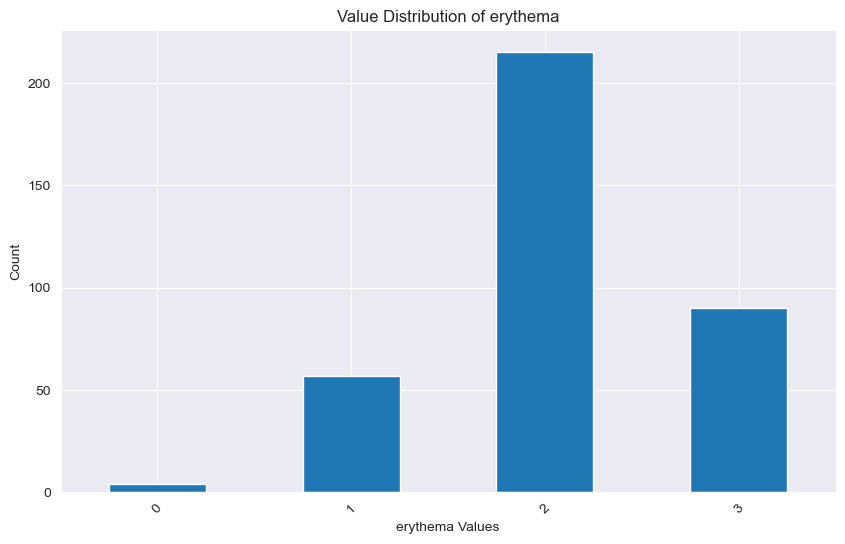

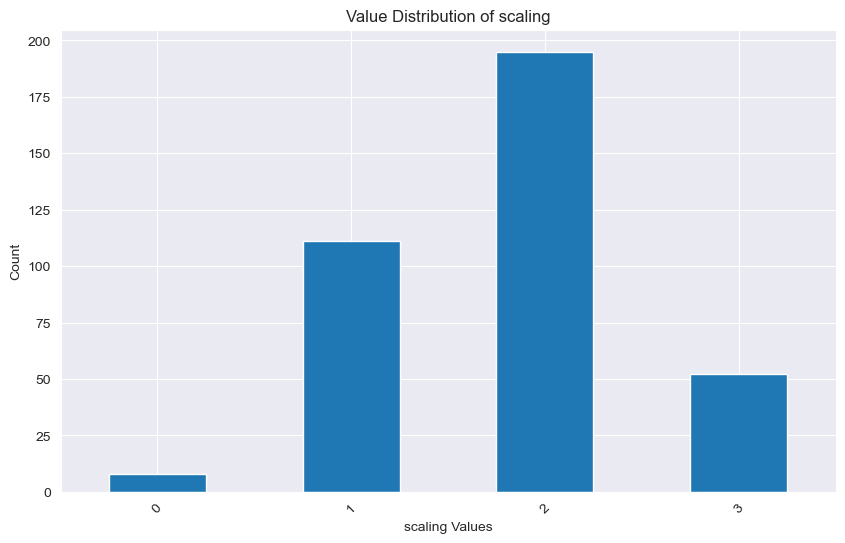

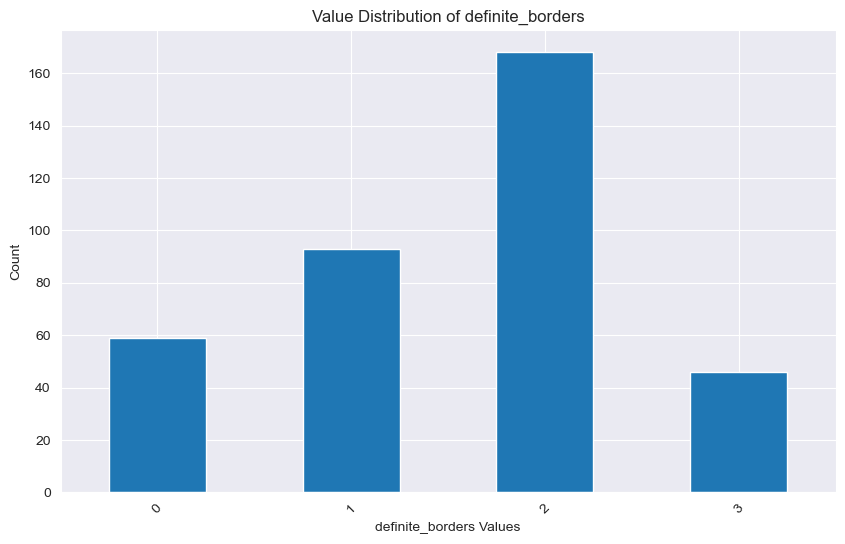

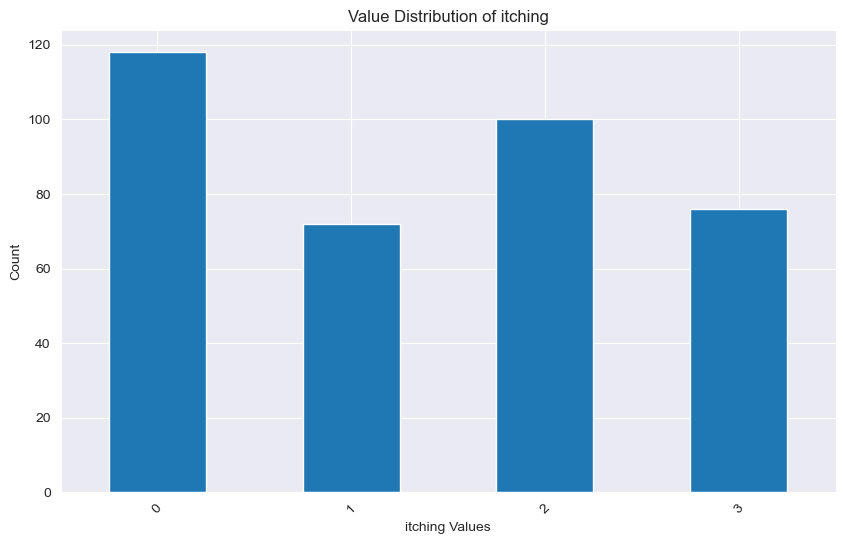

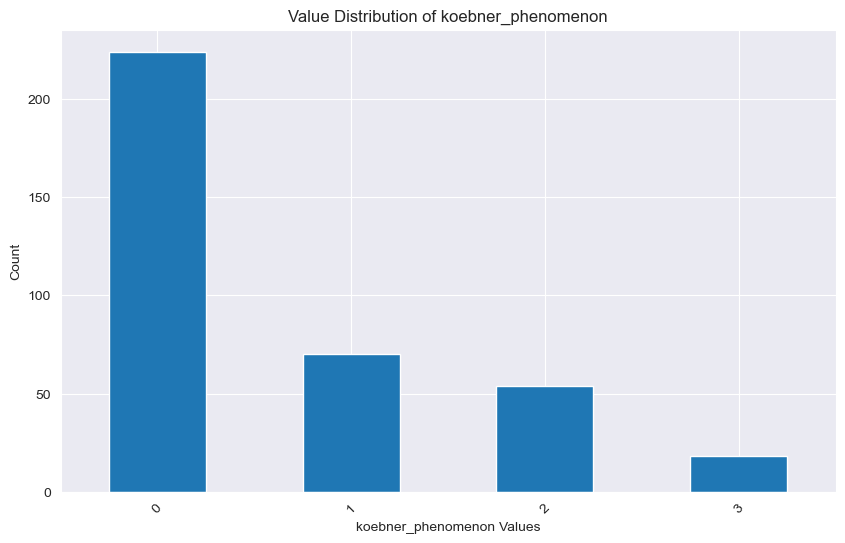

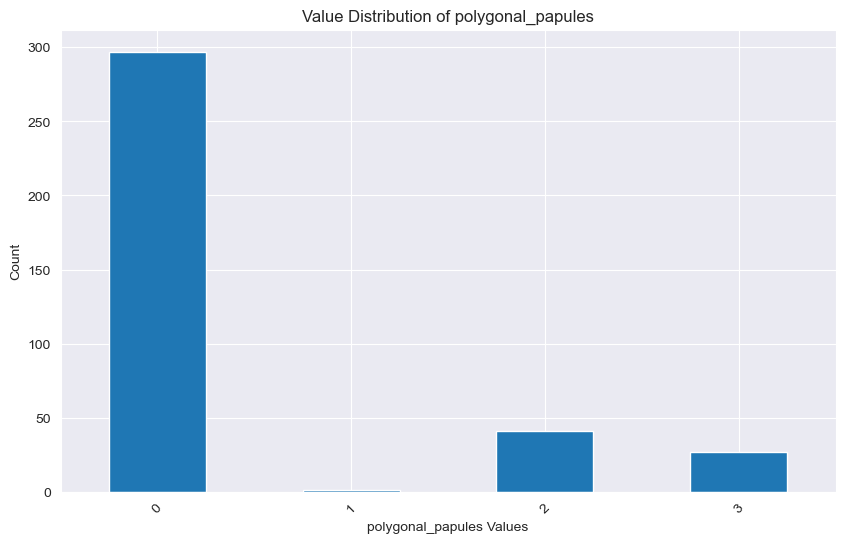

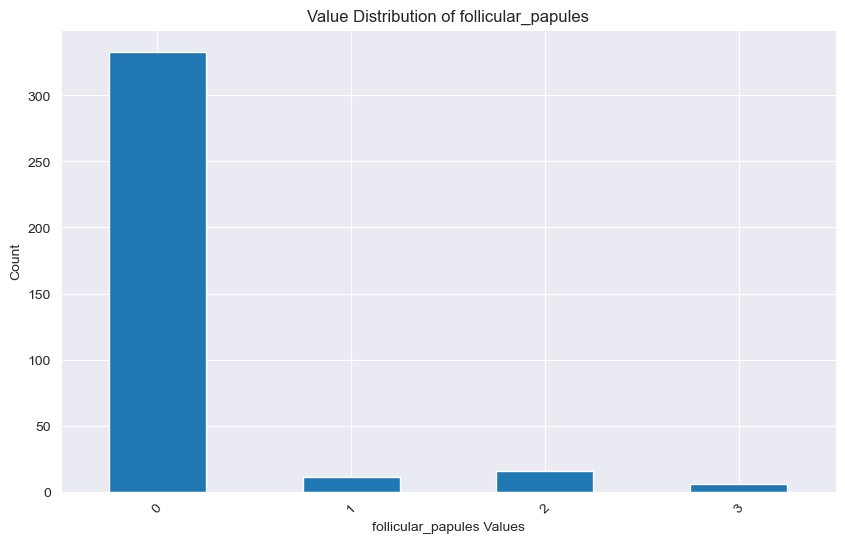

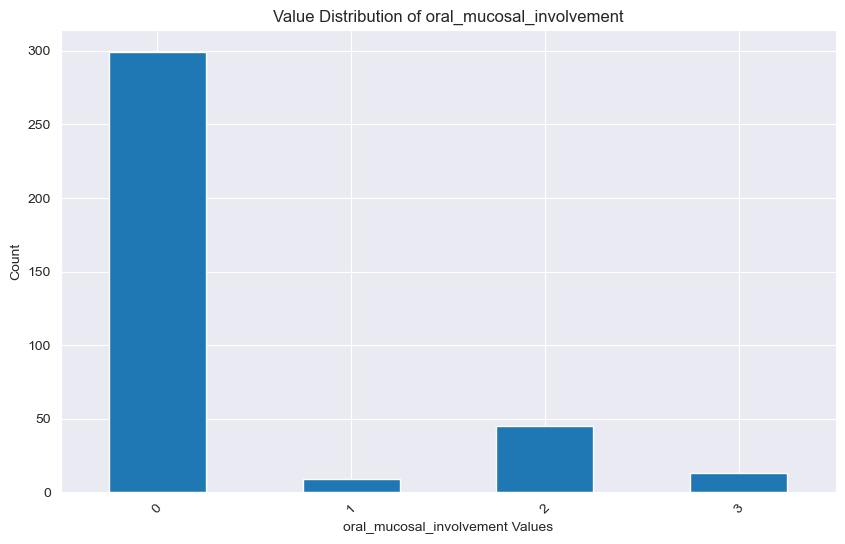

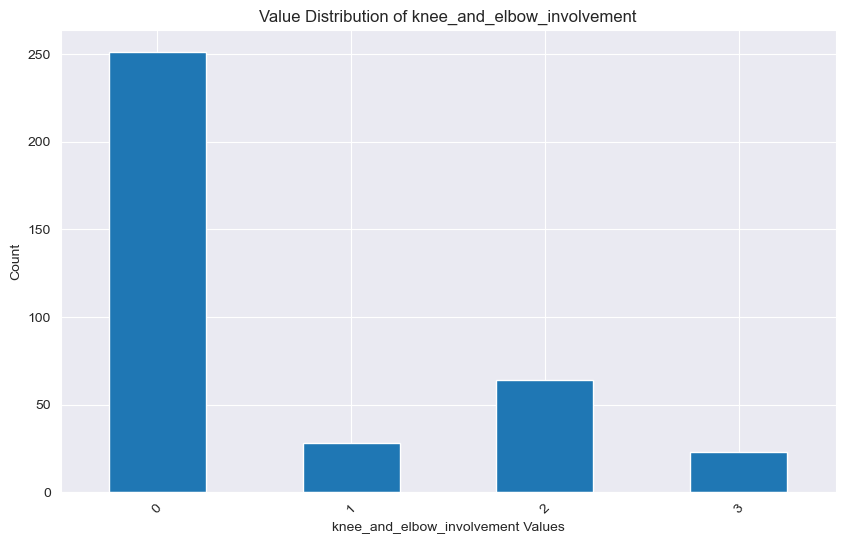

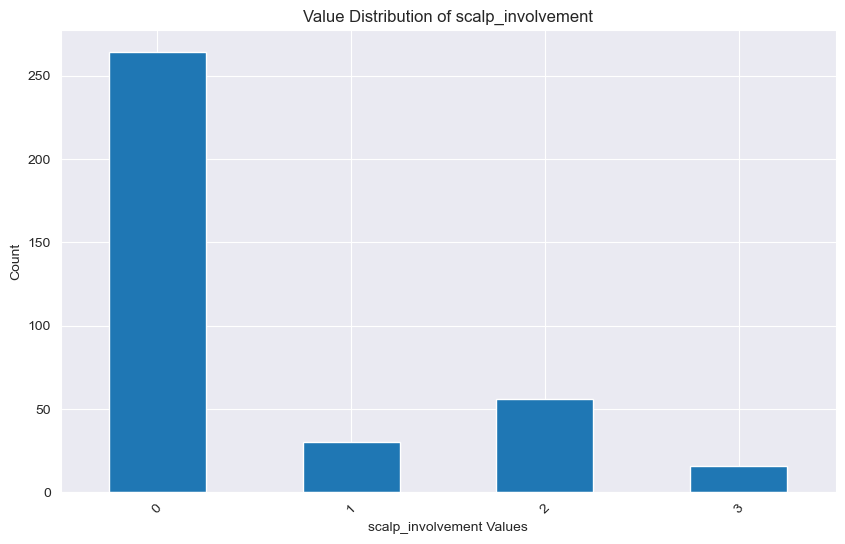

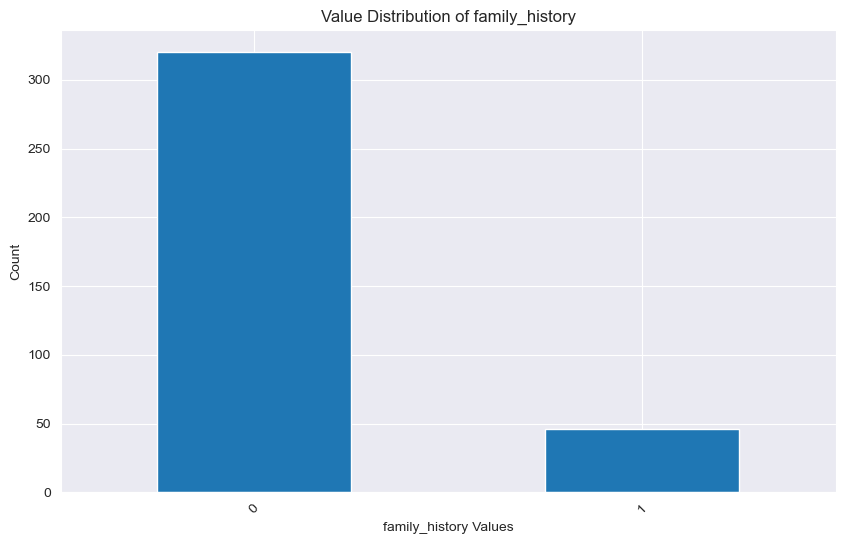

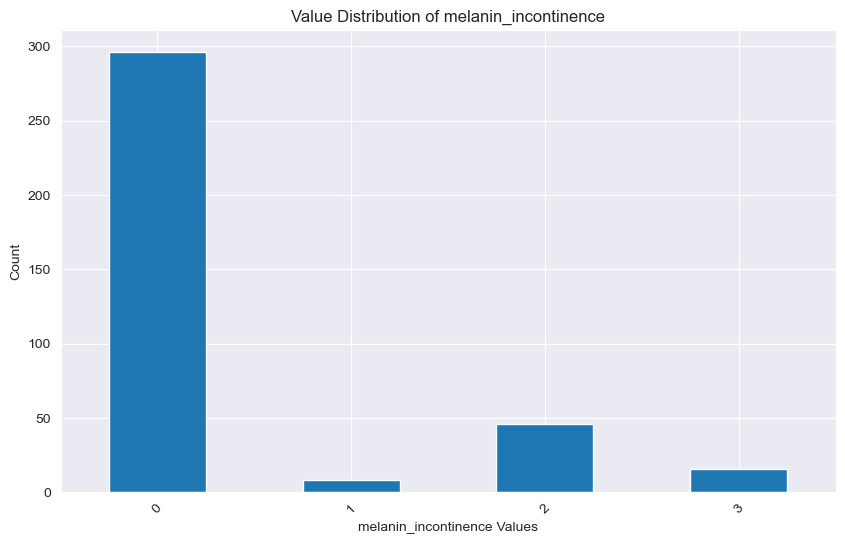

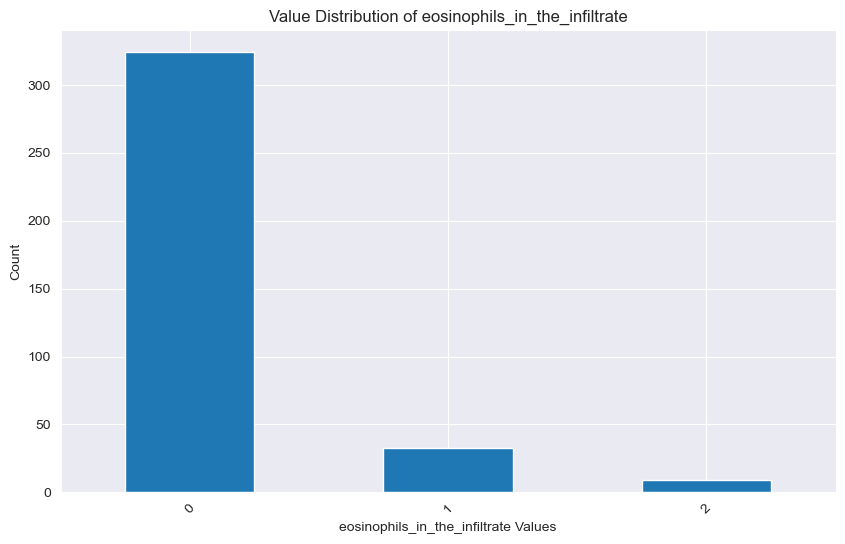

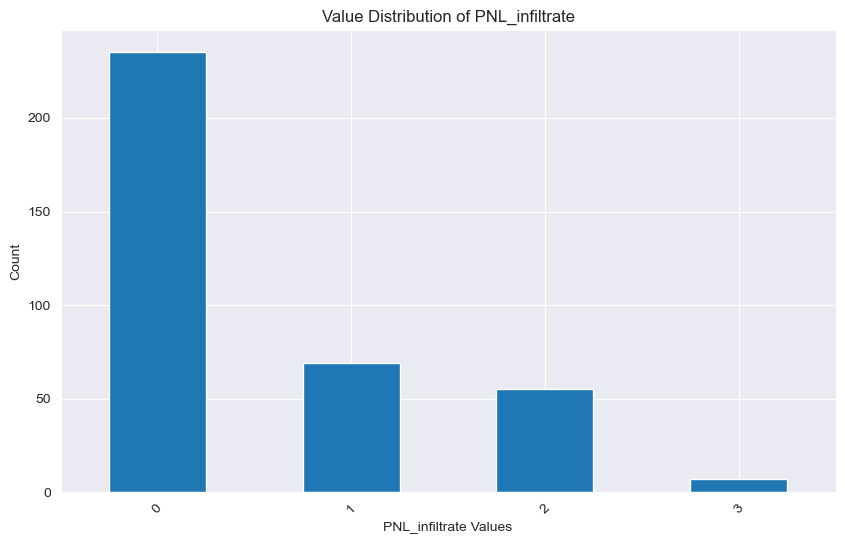

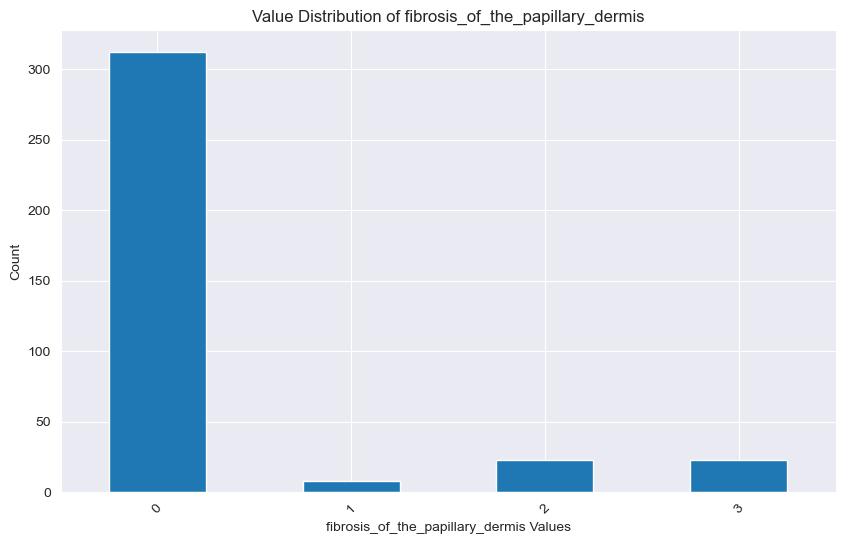

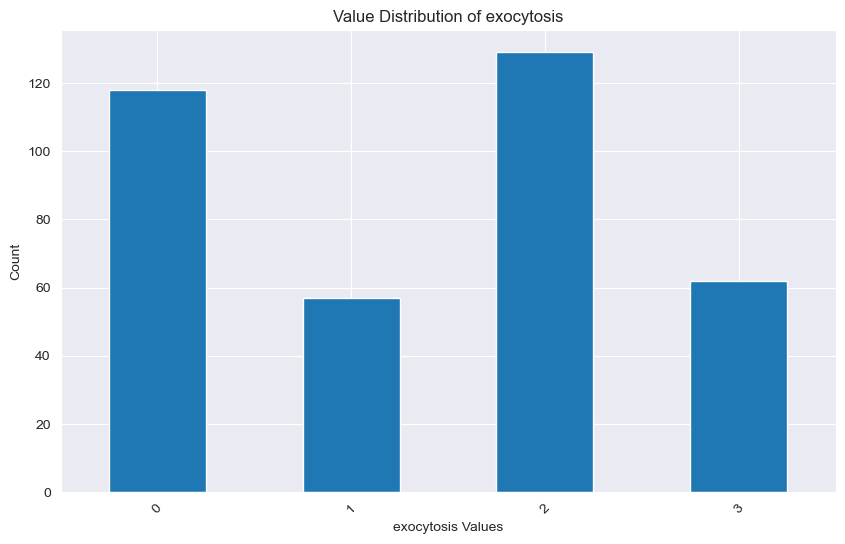

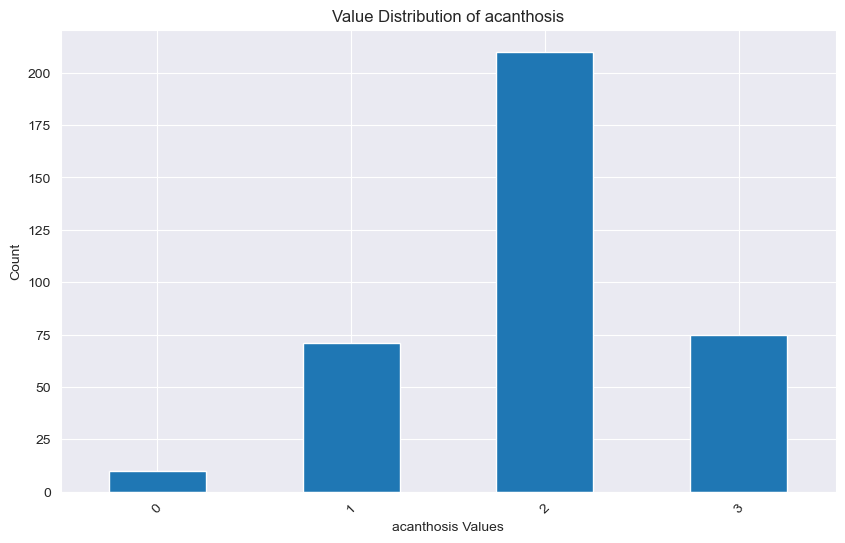

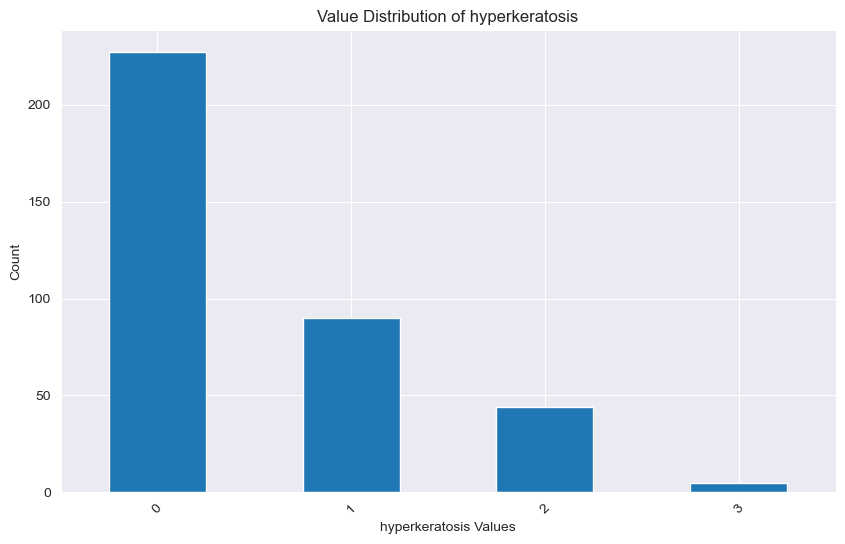

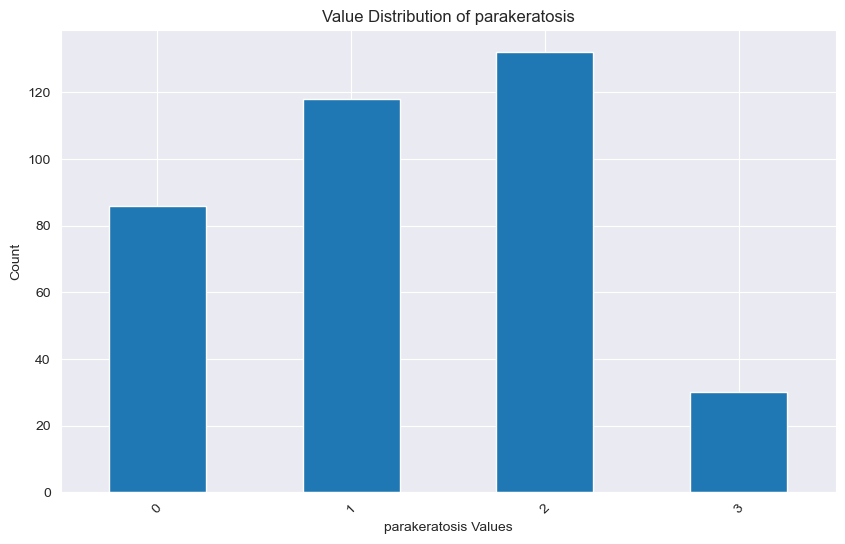

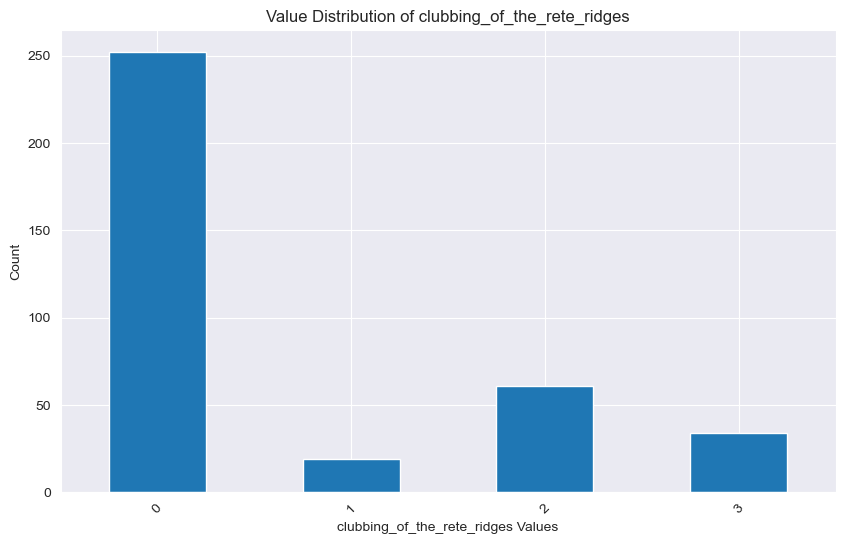

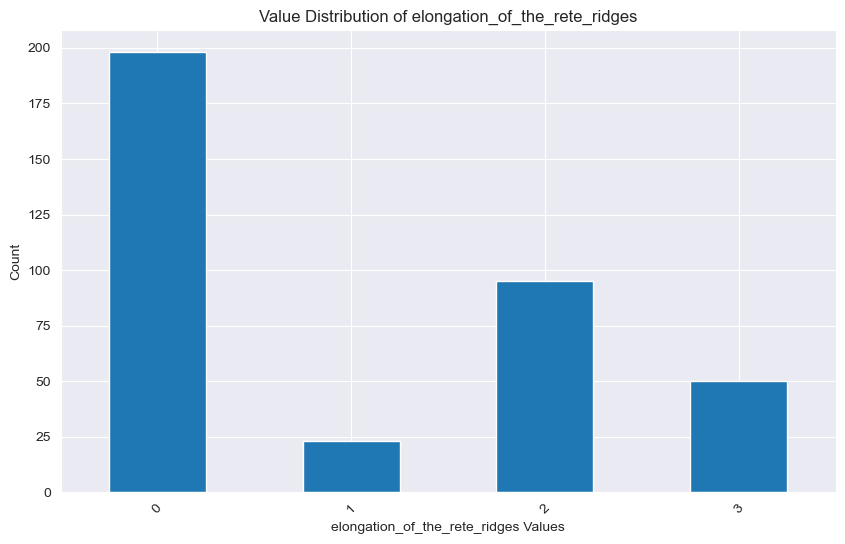

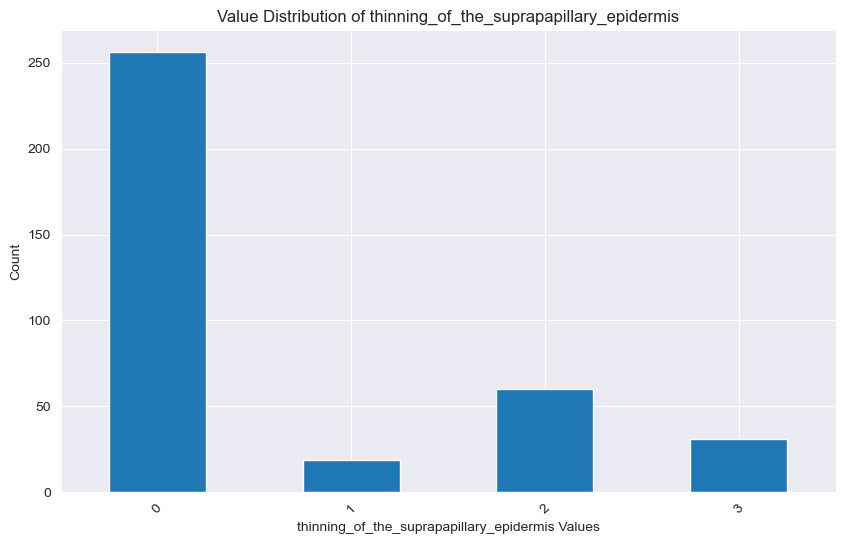

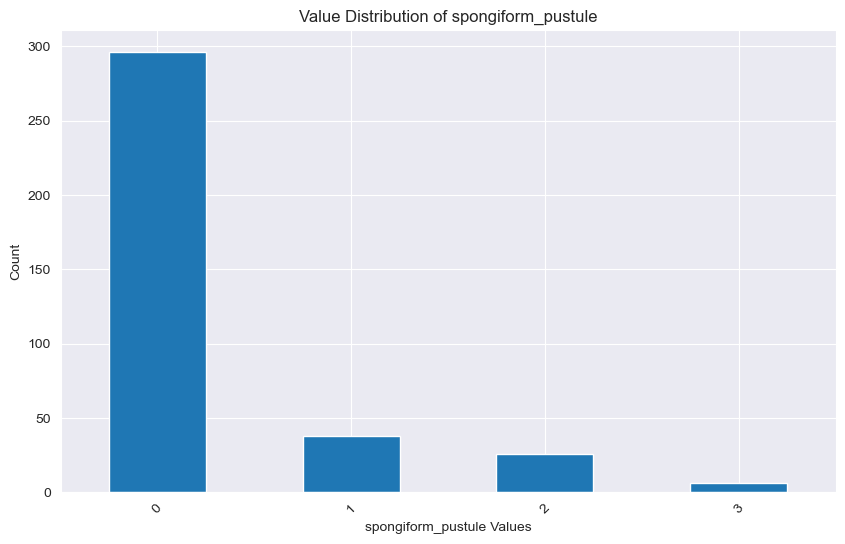

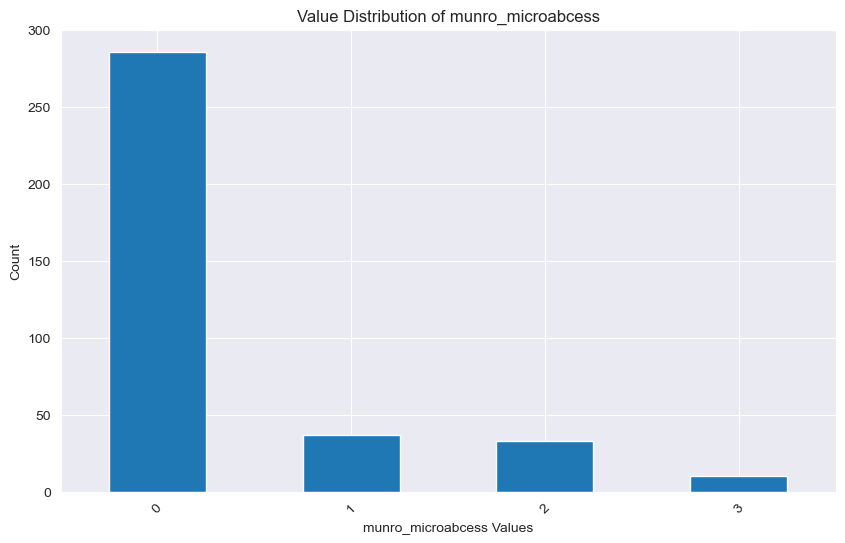

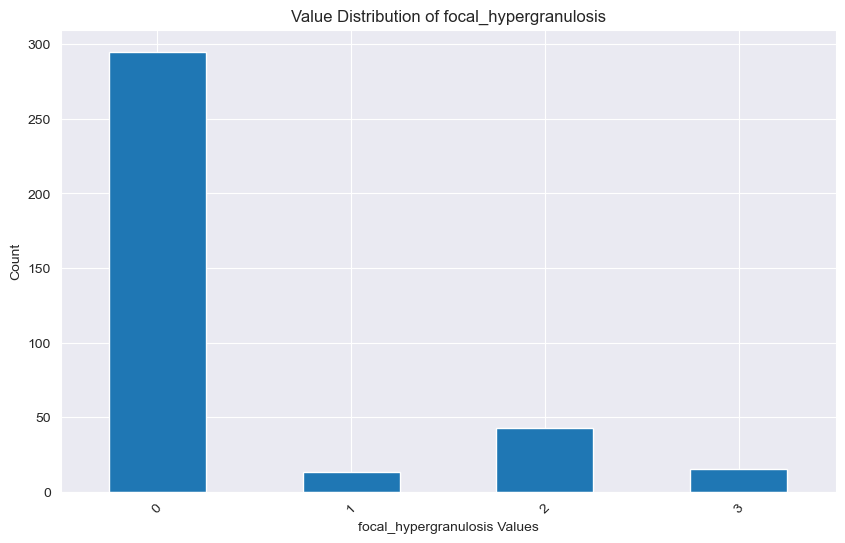

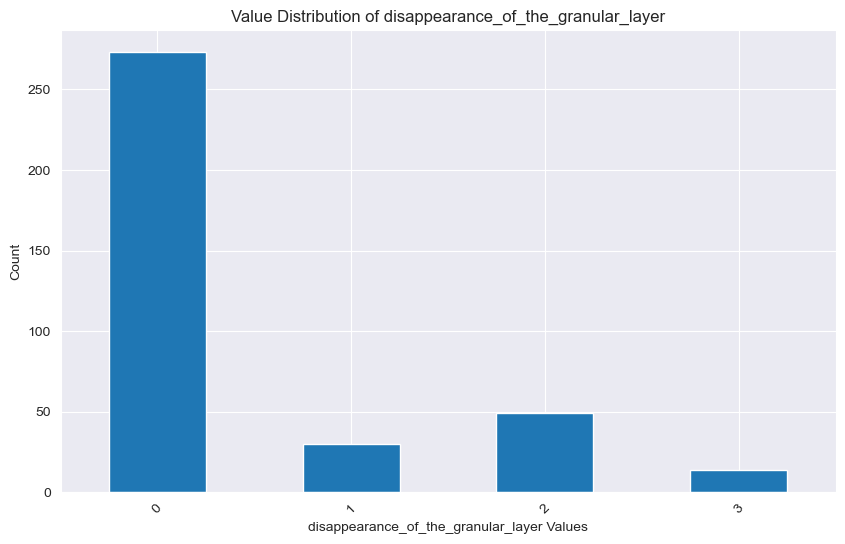

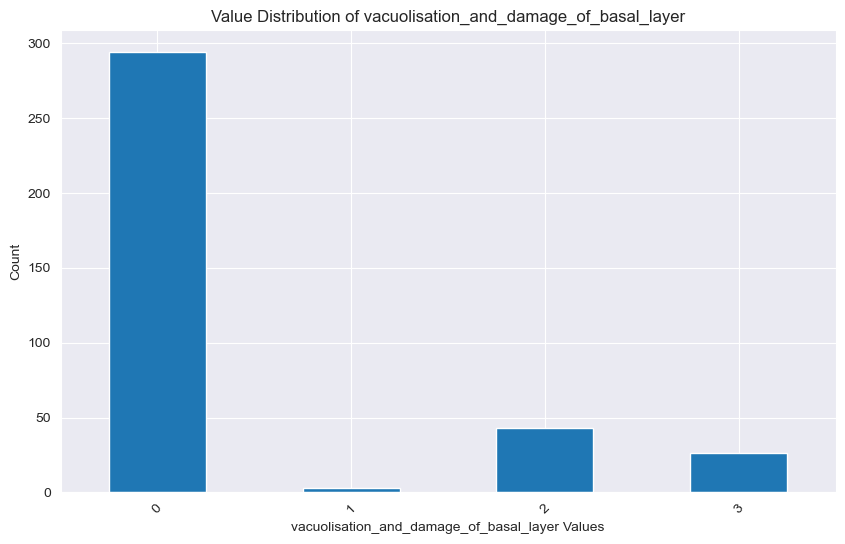

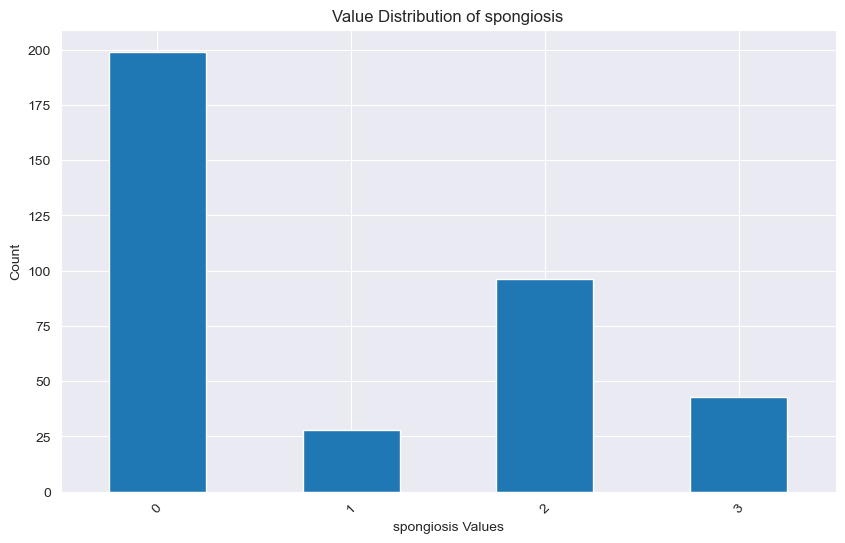

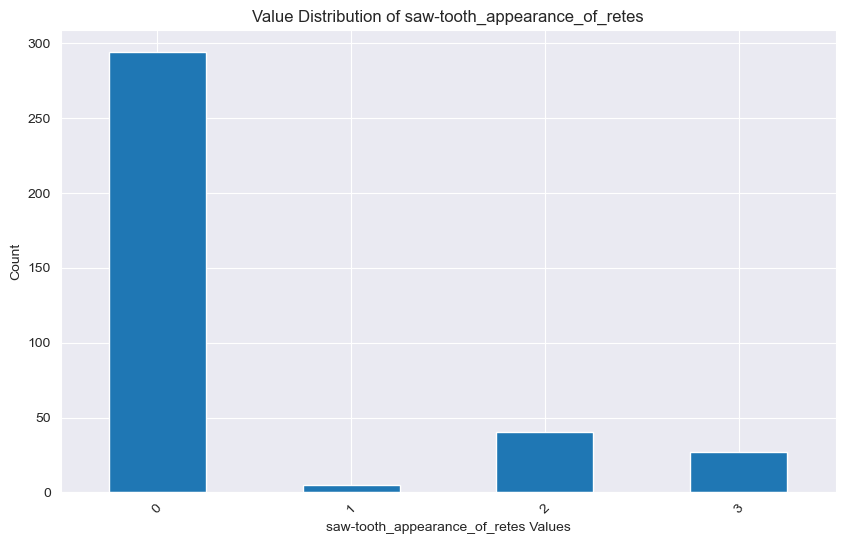

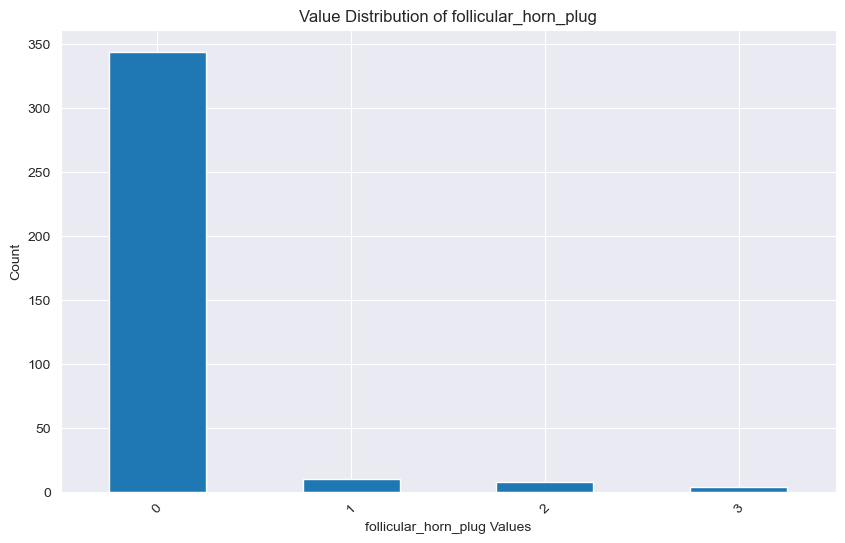

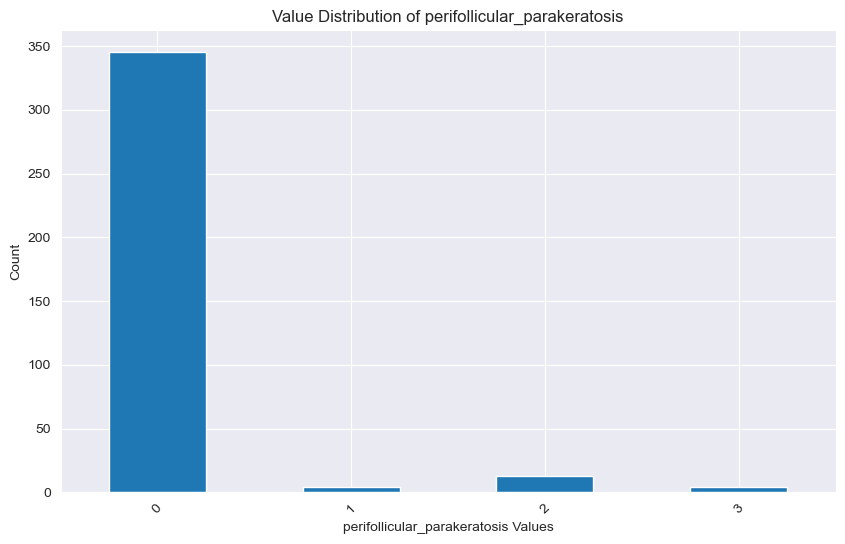

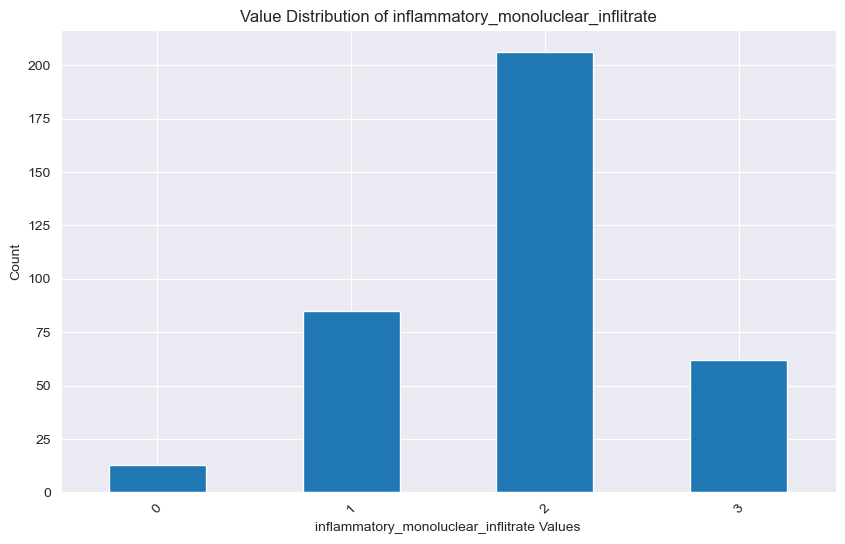

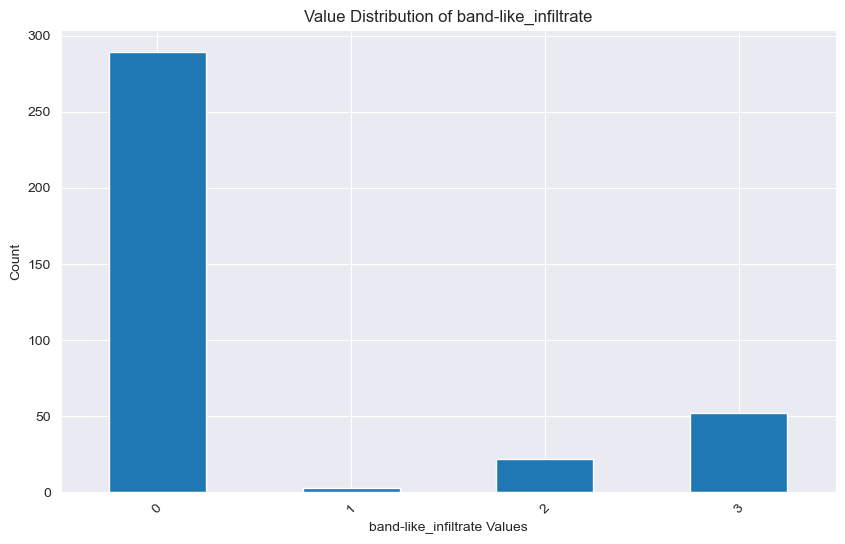

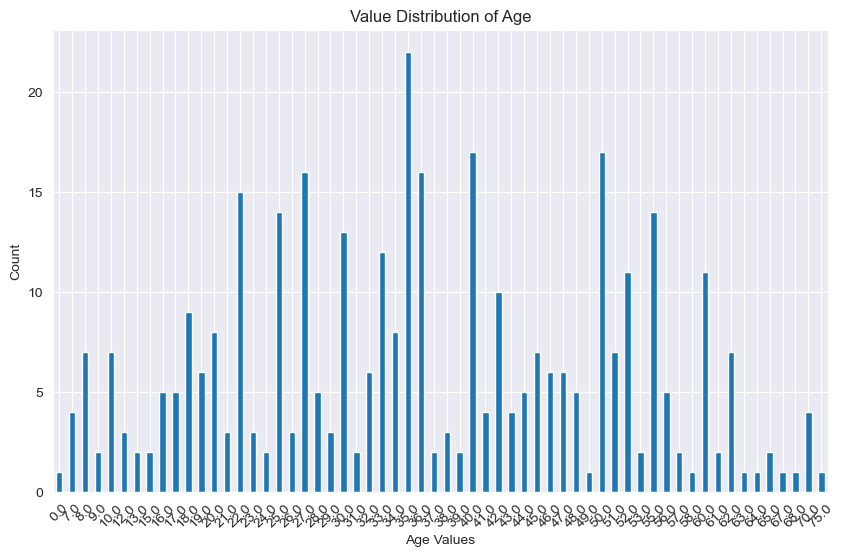

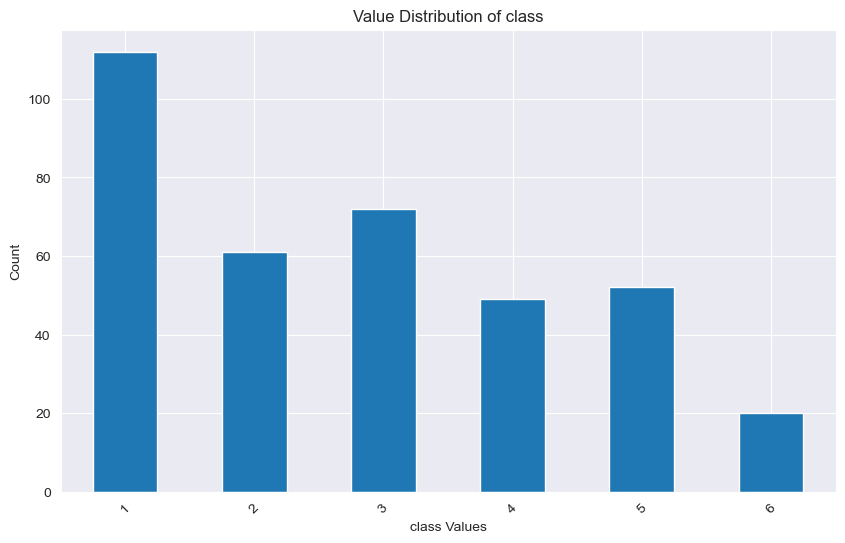

In [12]:
for col in data.columns:
    plt.figure(figsize=(10, 6))  # Optional: Set the figure size to make the plot clearer
    data[col].value_counts().sort_index().plot(kind='bar')  # Plot the bar chart
    plt.title(f'Value Distribution of {col}')  # Set a title for each plot
    plt.xlabel(f'{col} Values')  # Label for x-axis
    plt.ylabel('Count')  # Label for y-axis
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed for readability
    plt.show()

<Axes: xlabel='class'>

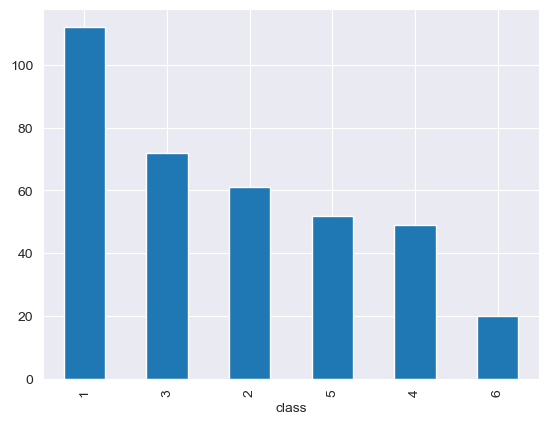

In [13]:
data['class'].value_counts().plot(kind='bar')

Given the presence of class imbalance in the dataset, it is crucial to find appropriate evaluation metrics that can effectively address this issue. In this analysis, we will utilize metrics such as the F1-score to evaluate the performance of machine learning classifiers. This approach allows us to accurately assess the models' ability to handle class imbalance and make reliable predictions

<Axes: xlabel='Age', ylabel='Count'>

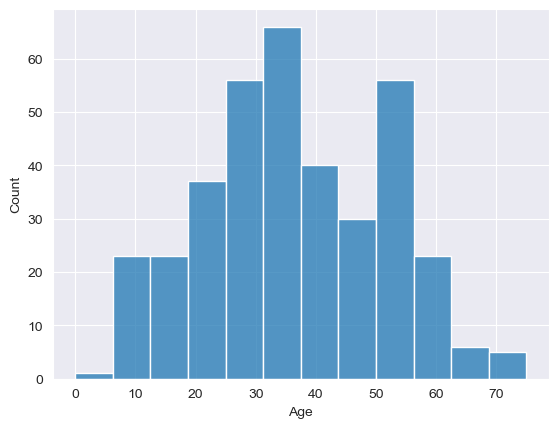

In [15]:
sns.histplot(data['Age'])

<Axes: xlabel='family_history'>

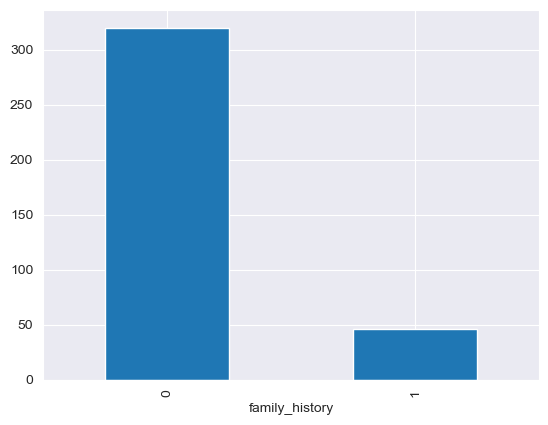

In [16]:
data['family_history'].value_counts().plot(kind='bar')


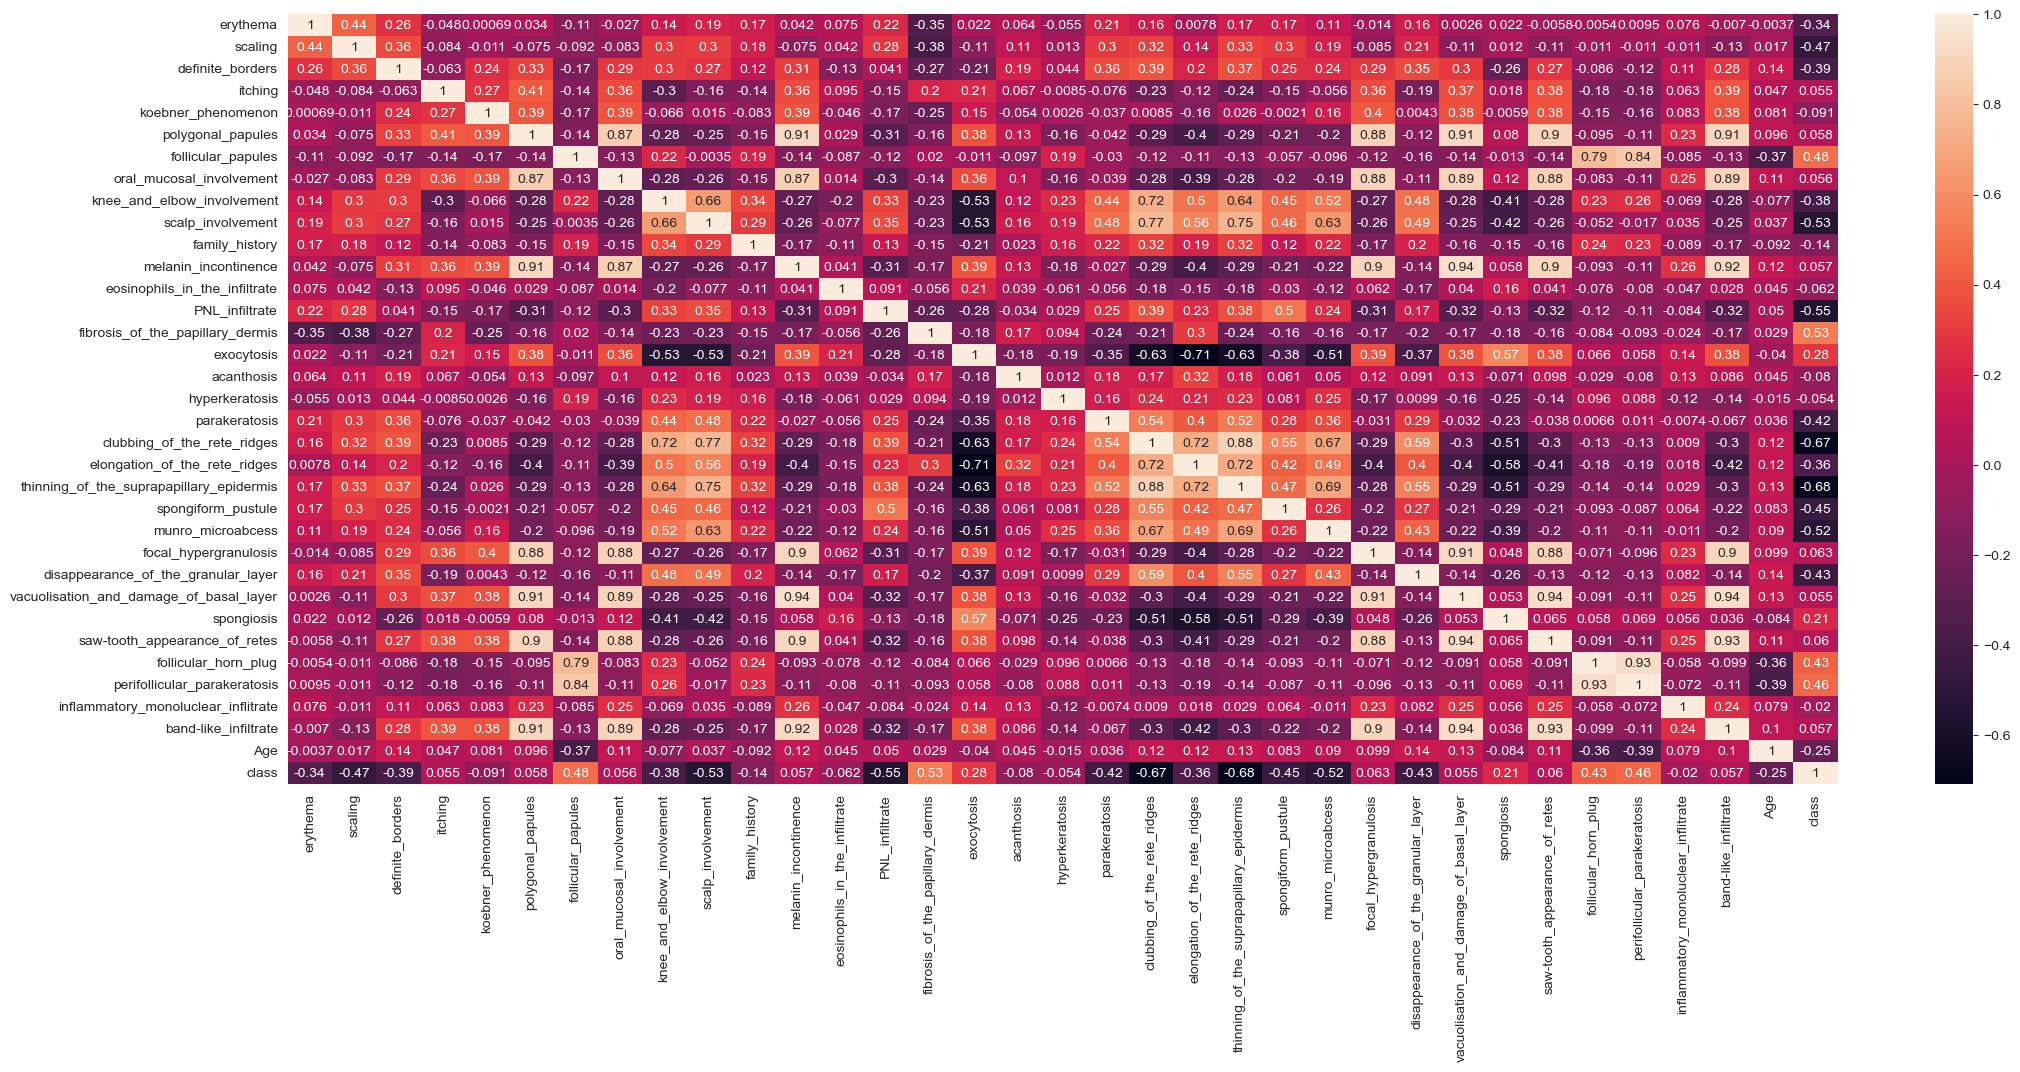

In [17]:
cor=data.corr()
fig, ax = plt.subplots(figsize=(25, 10))  # Set the figure size
sns.heatmap(cor,annot=True, ax=ax)
plt.show()

In [18]:
high_thres=0.85
high_corr_pairs = [
    (col1,col2) 
    for col1 in cor.columns
    for col2 in cor.columns
    if col1!=col2 and abs(cor[col1][col2])>high_thres
]
high_corr_pairs

[('polygonal_papules', 'oral_mucosal_involvement'),
 ('polygonal_papules', 'melanin_incontinence'),
 ('polygonal_papules', 'focal_hypergranulosis'),
 ('polygonal_papules', 'vacuolisation_and_damage_of_basal_layer'),
 ('polygonal_papules', 'saw-tooth_appearance_of_retes'),
 ('polygonal_papules', 'band-like_infiltrate'),
 ('oral_mucosal_involvement', 'polygonal_papules'),
 ('oral_mucosal_involvement', 'melanin_incontinence'),
 ('oral_mucosal_involvement', 'focal_hypergranulosis'),
 ('oral_mucosal_involvement', 'vacuolisation_and_damage_of_basal_layer'),
 ('oral_mucosal_involvement', 'saw-tooth_appearance_of_retes'),
 ('oral_mucosal_involvement', 'band-like_infiltrate'),
 ('melanin_incontinence', 'polygonal_papules'),
 ('melanin_incontinence', 'oral_mucosal_involvement'),
 ('melanin_incontinence', 'focal_hypergranulosis'),
 ('melanin_incontinence', 'vacuolisation_and_damage_of_basal_layer'),
 ('melanin_incontinence', 'saw-tooth_appearance_of_retes'),
 ('melanin_incontinence', 'band-like_i

In [19]:
# Assuming 'target' is the name of your target column
target_corr = cor['class'].abs().sort_values(ascending=False)
print(target_corr)


class                                       1.000000
thinning_of_the_suprapapillary_epidermis    0.684864
clubbing_of_the_rete_ridges                 0.668781
PNL_infiltrate                              0.550195
scalp_involvement                           0.533208
fibrosis_of_the_papillary_dermis            0.526976
munro_microabcess                           0.520995
follicular_papules                          0.477813
scaling                                     0.468688
perifollicular_parakeratosis                0.457025
spongiform_pustule                          0.449407
follicular_horn_plug                        0.431972
disappearance_of_the_granular_layer         0.427348
parakeratosis                               0.420742
definite_borders                            0.391974
knee_and_elbow_involvement                  0.383305
elongation_of_the_rete_ridges               0.357924
erythema                                    0.335537
exocytosis                                  0.

After finiding the correlation matrix we check for the highly correlated pairs with target var here we can see the features highly correlated with target also
higly correlated with each other which will lead to multicollinearity and since our dataset is imbalance we will use the Tree Based algorithms like Random
forest ,DecisionTrees or KNN so we keep all the features since they are important and effect our prediciton


In [31]:
##using tsne to visualize
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [32]:
y

array([2, 1, 3, 1, 3, 2, 5, 3, 4, 4, 1, 2, 2, 1, 3, 4, 2, 1, 3, 5, 6, 2,
       5, 3, 5, 1, 6, 5, 2, 3, 1, 2, 1, 1, 4, 2, 3, 2, 3, 1, 2, 4, 1, 2,
       5, 3, 4, 6, 2, 3, 3, 4, 1, 1, 5, 1, 2, 3, 4, 2, 6, 1, 5, 1, 2, 3,
       1, 4, 5, 1, 2, 6, 3, 5, 4, 2, 2, 1, 3, 5, 1, 2, 2, 2, 5, 1, 1, 3,
       1, 4, 2, 2, 5, 1, 3, 4, 2, 5, 1, 6, 2, 5, 1, 2, 2, 1, 4, 1, 3, 1,
       1, 3, 5, 3, 3, 5, 2, 3, 4, 1, 2, 5, 6, 1, 1, 2, 6, 3, 5, 4, 1, 1,
       3, 5, 5, 1, 4, 2, 3, 1, 2, 1, 1, 3, 3, 3, 2, 5, 4, 2, 2, 1, 1, 1,
       5, 3, 2, 3, 2, 2, 4, 2, 3, 6, 2, 1, 1, 3, 4, 3, 3, 1, 1, 1, 3, 1,
       1, 2, 3, 3, 1, 1, 1, 1, 6, 2, 2, 2, 2, 1, 3, 3, 3, 1, 1, 2, 3, 2,
       2, 2, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 6, 6, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 6, 6, 6, 4, 4, 4, 1, 1, 1, 1, 1, 2, 2, 4, 4, 4, 1, 1, 2, 2,
       2, 3, 3, 3, 3, 1, 1, 1, 1, 5, 5, 5, 5, 5, 3,

In [33]:
le = LabelEncoder()
y = le.fit_transform(y)

In [34]:
y

array([1, 0, 2, 0, 2, 1, 4, 2, 3, 3, 0, 1, 1, 0, 2, 3, 1, 0, 2, 4, 5, 1,
       4, 2, 4, 0, 5, 4, 1, 2, 0, 1, 0, 0, 3, 1, 2, 1, 2, 0, 1, 3, 0, 1,
       4, 2, 3, 5, 1, 2, 2, 3, 0, 0, 4, 0, 1, 2, 3, 1, 5, 0, 4, 0, 1, 2,
       0, 3, 4, 0, 1, 5, 2, 4, 3, 1, 1, 0, 2, 4, 0, 1, 1, 1, 4, 0, 0, 2,
       0, 3, 1, 1, 4, 0, 2, 3, 1, 4, 0, 5, 1, 4, 0, 1, 1, 0, 3, 0, 2, 0,
       0, 2, 4, 2, 2, 4, 1, 2, 3, 0, 1, 4, 5, 0, 0, 1, 5, 2, 4, 3, 0, 0,
       2, 4, 4, 0, 3, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 4, 3, 1, 1, 0, 0, 0,
       4, 2, 1, 2, 1, 1, 3, 1, 2, 5, 1, 0, 0, 2, 3, 2, 2, 0, 0, 0, 2, 0,
       0, 1, 2, 2, 0, 0, 0, 0, 5, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1,
       1, 1, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 5, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 5, 5, 5, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 0, 0, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 0, 0, 4, 4, 4, 4, 4, 2,

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 366 samples in 0.000s...
[t-SNE] Computed neighbors for 366 samples in 0.316s...
[t-SNE] Computed conditional probabilities for sample 366 / 366
[t-SNE] Mean sigma: 4.362842
[t-SNE] Computed conditional probabilities in 0.021s
[t-SNE] Iteration 50: error = 47.8347626, gradient norm = 0.0662429 (50 iterations in 0.146s)
[t-SNE] Iteration 100: error = 47.1566238, gradient norm = 0.0058462 (50 iterations in 0.098s)
[t-SNE] Iteration 150: error = 47.1598206, gradient norm = 0.0026798 (50 iterations in 0.065s)
[t-SNE] Iteration 200: error = 47.1597328, gradient norm = 0.0005034 (50 iterations in 0.069s)
[t-SNE] Iteration 250: error = 47.1595230, gradient norm = 0.0007939 (50 iterations in 0.075s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.159523
[t-SNE] Iteration 300: error = 0.2518333, gradient norm = 0.0032914 (50 iterations in 0.090s)
[t-SNE] Iteration 350: error = 0.2399479, gradient norm = 0.0018136 

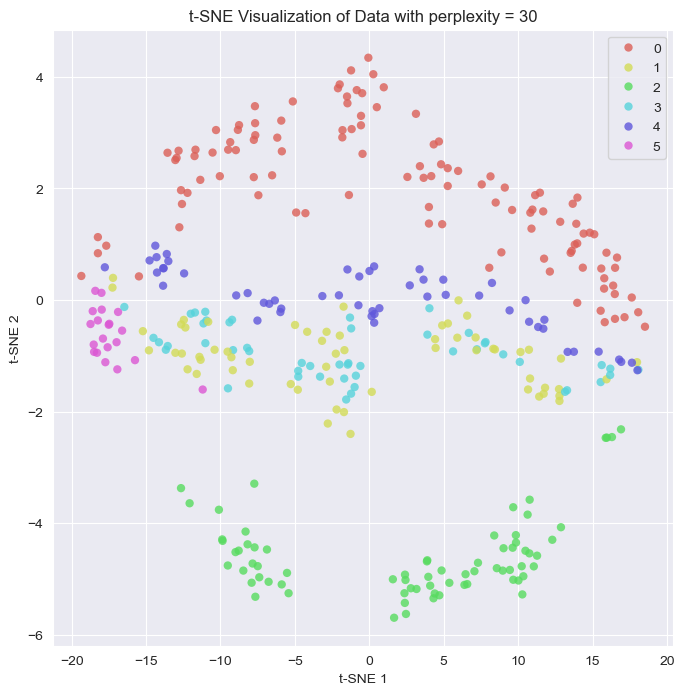

In [35]:
tsne = TSNE(n_components=2, random_state=110, verbose=2,perplexity=50)
x_tsne = tsne.fit_transform(x)
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=0.8, edgecolor='none'
)
plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 30')
plt.legend(loc='upper right')
plt.show()

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 366 samples in 0.002s...
[t-SNE] Computed neighbors for 366 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 366 / 366
[t-SNE] Mean sigma: 6.308126
[t-SNE] Computed conditional probabilities in 0.038s
[t-SNE] Iteration 50: error = 42.4505959, gradient norm = 0.0237122 (50 iterations in 0.195s)
[t-SNE] Iteration 100: error = 42.1823196, gradient norm = 0.0000739 (50 iterations in 0.091s)
[t-SNE] Iteration 150: error = 42.1822968, gradient norm = 0.0000613 (50 iterations in 0.091s)
[t-SNE] Iteration 200: error = 42.1822853, gradient norm = 0.0004149 (50 iterations in 0.088s)
[t-SNE] Iteration 250: error = 42.1823120, gradient norm = 0.0000922 (50 iterations in 0.119s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.182312
[t-SNE] Iteration 300: error = 0.1383482, gradient norm = 0.0034739 (50 iterations in 0.133s)
[t-SNE] Iteration 350: error = 0.1333168, gradient norm = 0.0005916 

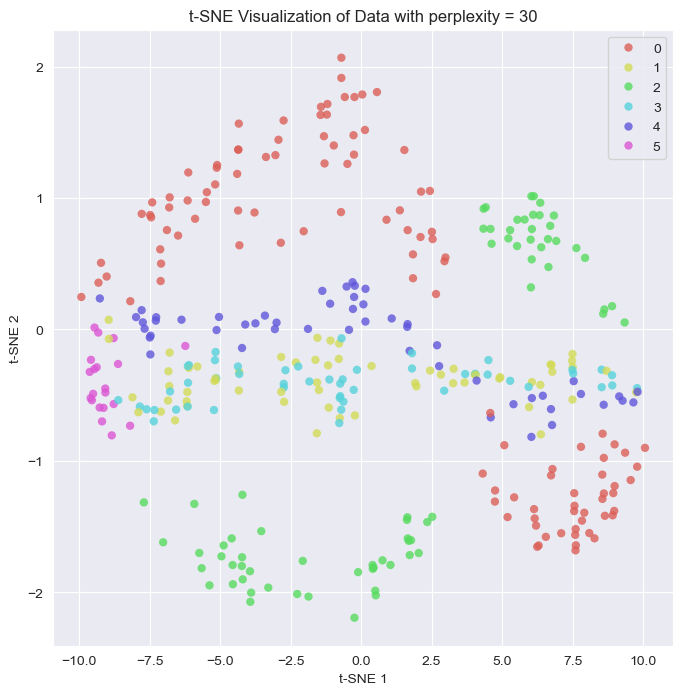

In [36]:
tsne = TSNE(n_components=2, random_state=110, verbose=2,perplexity=100)
x_tsne = tsne.fit_transform(x)

plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=0.8, edgecolor='none'
)

plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 30')
plt.legend(loc='upper right')
plt.show()

[t-SNE] Computing 365 nearest neighbors...
[t-SNE] Indexed 366 samples in 0.001s...
[t-SNE] Computed neighbors for 366 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 366 / 366
[t-SNE] Mean sigma: 11.352487
[t-SNE] Computed conditional probabilities in 0.048s
[t-SNE] Iteration 50: error = 36.3772354, gradient norm = 0.0000002 (50 iterations in 0.222s)
[t-SNE] Iteration 100: error = 36.3770409, gradient norm = 0.0000000 (50 iterations in 0.200s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 100 iterations with early exaggeration: 36.377041
[t-SNE] Iteration 150: error = 0.0713863, gradient norm = 0.0058757 (50 iterations in 0.181s)
[t-SNE] Iteration 200: error = 0.0280325, gradient norm = 0.0002753 (50 iterations in 0.176s)
[t-SNE] Iteration 250: error = 0.0274036, gradient norm = 0.0004432 (50 iterations in 0.176s)
[t-SNE] Iteration 300: error = 0.0275864, gradient norm = 0.0001632 (50 iterations in 0.192s)
[t-SNE] Itera

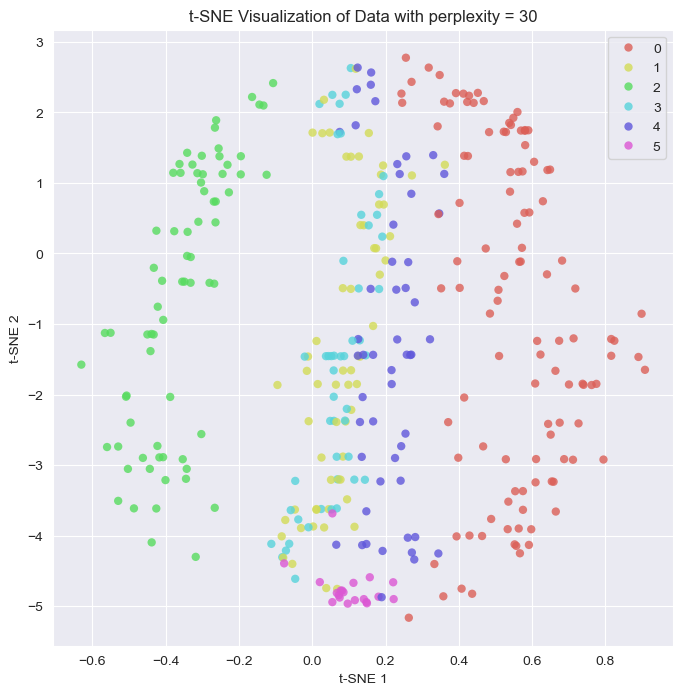

In [37]:
tsne = TSNE(n_components=2, random_state=110, verbose=2,perplexity=200)
x_tsne = tsne.fit_transform(x)
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=0.8, edgecolor='none'
)
plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 30')
plt.legend(loc='upper right')
plt.show()

Upon analyzing the dataset, we can observe that the class features '0', '2', and '5' appear to be well separated and distinguishable. However, the class features '1', '3', and '4' exhibit overlapping patterns, making it challenging to separate them effectively. This overlapping nature may pose difficulties for our model, as it may struggle to accurately classify instances belonging to these classes

In [376]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [378]:
le = LabelEncoder()
y = le.fit_transform(y)

In [380]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 110)

In [382]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(292, 34)
(292,)
(74, 34)
(74,)


In [384]:
X_test

array([[ 2.,  1.,  2., ...,  2.,  3., 26.],
       [ 3.,  3.,  3., ...,  2.,  0., 38.],
       [ 2.,  3.,  0., ...,  2.,  0., 52.],
       ...,
       [ 2.,  3.,  2., ...,  2.,  0., 55.],
       [ 2.,  2.,  1., ...,  2.,  0., 22.],
       [ 2.,  2.,  1., ...,  2.,  0., 35.]])

In [386]:
results={}

In [389]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
results['K-Nearest Neighbors (KNN)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted')
                                  ]

In [391]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
results['Decision Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted')]

In [393]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
results['Random Forest'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted')]

In [395]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

results['AdaBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  ]

In [397]:
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)
results['XGBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                ]

In [88]:
!pip install xgboost

In [400]:
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_results

,Accuracy,Precision,Recall,F1-Score
K-Nearest Neighbors (KNN),0.891892,0.916982,0.891892,0.892990
Decision Trees,0.972973,0.978979,0.972973,0.973311
Random Forest,0.986486,0.988176,0.986486,0.986615
AdaBoost,0.500000,0.436937,0.500000,0.422382
XGBoost,0.986486,0.988176,0.986486,0.986615


In [402]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00        14
           3       0.88      1.00      0.93         7
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         4

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



Text(0.5, 0, 'Relative Importance')

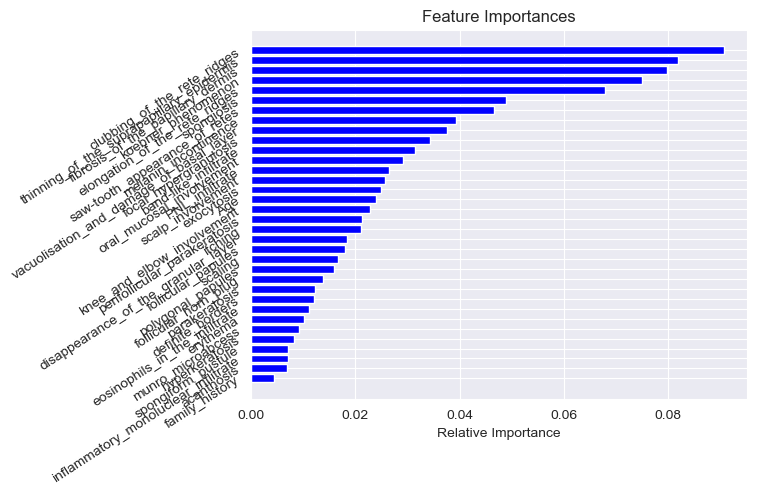

In [404]:
features=data.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices],rotation=33)
plt.xlabel('Relative Importance')

Tuning Random forest Model

In [406]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [ 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
accuracy = best_rf.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Test Accuracy: 0.9864864864864865


In [429]:
model_g=RandomForestClassifier(bootstrap=True, max_depth = 10, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split =  10, n_estimators= 100)
model_g.fit(X_train, y_train) 
y_pred_grid = model_g.predict(X_test) 
print(classification_report(y_pred_grid, y_test)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        14
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         4

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



In [432]:
best_rf.feature_importances_

array([0.00970758, 0.013591  , 0.01062451, 0.01421972, 0.07513349,
       0.03753929, 0.01759393, 0.0193375 , 0.03436047, 0.02240701,
       0.00309077, 0.04511618, 0.00668257, 0.0331949 , 0.08264694,
       0.03341626, 0.00538466, 0.00510415, 0.00546699, 0.07822523,
       0.06837008, 0.085052  , 0.0047375 , 0.01655835, 0.03829441,
       0.01788213, 0.05573866, 0.04859963, 0.03324774, 0.01978582,
       0.01307877, 0.0035494 , 0.02578635, 0.016476  ])

Text(0.5, 0, 'Relative Importance')

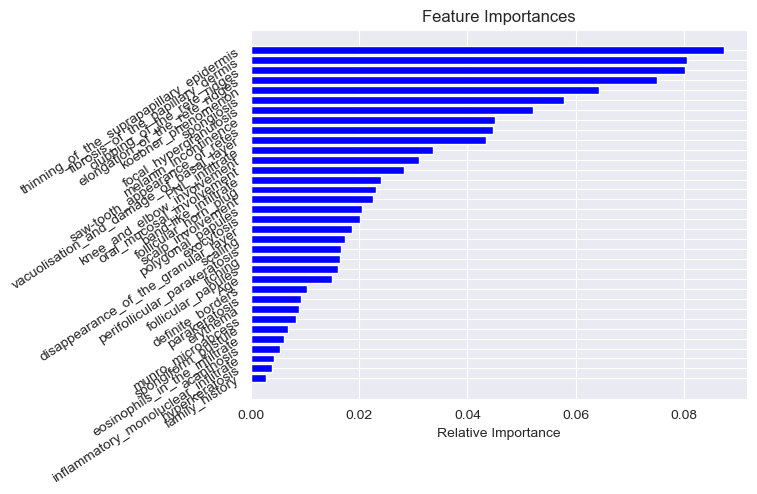

In [434]:
features=data.columns
importances = model_g.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices],rotation=33)
plt.xlabel('Relative Importance')

In [436]:
model_g.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [438]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [440]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.sample(20))


    Actual  Predicted
19       2          2
3        0          0
21       0          0
17       0          0
57       0          0
33       4          4
11       0          0
6        0          0
59       2          2
15       0          0
61       4          4
66       3          3
24       2          2
12       4          4
34       4          4
50       3          3
70       4          4
68       2          2
53       1          1
42       0          0


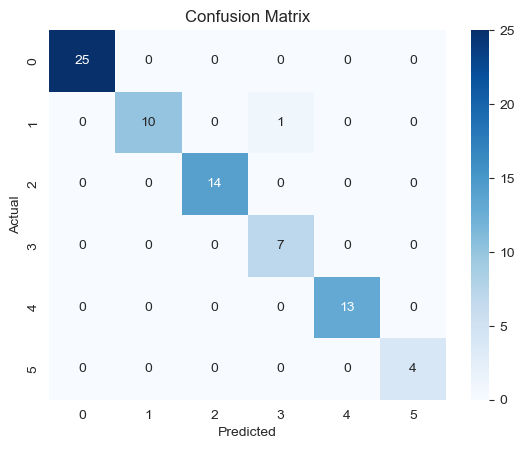

In [442]:
cm=confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [444]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
misclassified = comparison[comparison['Actual'] != comparison['Predicted']]
print("Misclassified Points:\n", misclassified)


Misclassified Points:
     Actual  Predicted
52       1          3


In [446]:
a1=pd.DataFrame(X_test)

In [448]:
misclassified_features =a1.iloc[misclassified.index]
print("Features of Misclassified Points:\n", misclassified_features)


Features of Misclassified Points:
      0    1    2    3    4    5    6    7    8    9   ...   24   25   26   27  \
52  2.0  2.0  1.0  2.0  2.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  2.0   

     28   29   30   31   32    33  
52  0.0  0.0  0.0  2.0  0.0  20.0  

[1 rows x 34 columns]
